In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('/content/archive (2).zip', usecols=['Age','Fare','Survived'])

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(331, 3)

In [8]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [9]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
x_train.head(2)

,Age,Fare
281,0.75,13.775
96,76.00,78.850


In [13]:
clf = DecisionTreeClassifier()

clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [14]:
accuracy_score(y_test,y_pred)

0.582089552238806

In [15]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

np.float64(0.5649732620320854)

In [18]:
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [19]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [20]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.fit_transform(x_test)

In [30]:
trf.named_transformers_['second'].n_bins_
KBinsDiscretizer(encode='ordinal',n_bins=10)

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [31]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'agr_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [32]:
output['age_labels'] = pd.cut(x=x_train['Age'],
                              bins=trf.named_transformers_['first'].n_bins_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'],
                              bins=trf.named_transformers_['second'].n_bins_[0].tolist())

In [33]:
output.sample(5)

,age,agr_trf,fare,fare_trf,age_labels,fare_labels
406,23.0,3.0,10.5000,3.0,"(15.464, 23.031]","(-0.512, 51.233]"
285,36.0,6.0,7.2500,0.0,"(30.598, 38.165]","(-0.512, 51.233]"
385,24.0,3.0,65.0000,8.0,"(23.031, 30.598]","(51.233, 102.466]"
405,20.0,2.0,13.8625,4.0,"(15.464, 23.031]","(-0.512, 51.233]"
177,54.0,9.0,55.4417,7.0,"(53.299, 60.866]","(51.233, 102.466]"


In [34]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2 = clf.predict(x_test_trf)

In [35]:
accuracy_score(y_test,y_pred2)

0.5970149253731343

In [36]:
x_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

np.float64(0.5651515151515151)

In [51]:
def discretize(bins, strategy):
  kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy='quantile')
  kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy='quantile')

  trf = ColumnTransformer([
      ('first',kbin_age,[0]),
      ('second',kbin_fare,[1])
  ])

  x_trf = trf.fit_transform(x)
  print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))

  plt.figure(figsize=(14, 4))
  plt.subplot(121)
  plt.hist(x['Age'])
  plt.title("Before")

  plt.subplot(122)
  plt.hist(x_trf[:,1],color='red')
  plt.title("After")

  plt.show()

0.5649732620320856


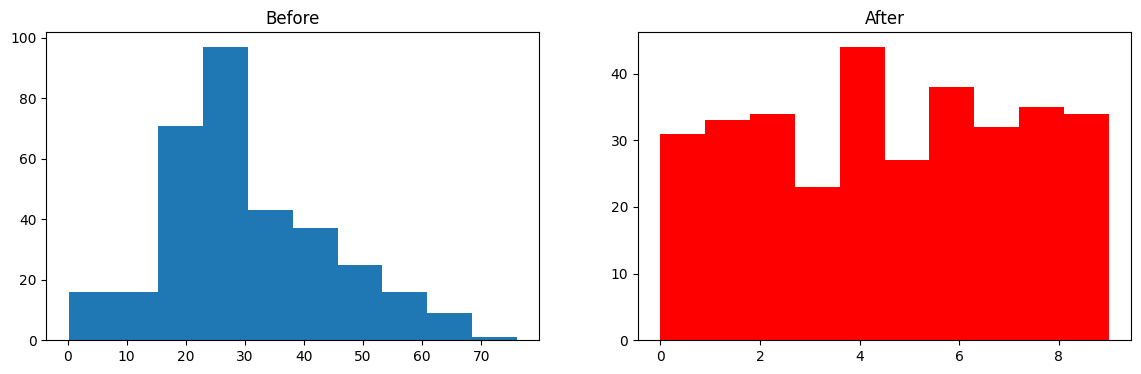

In [52]:
discretize(10,'quatile')